<a href="https://colab.research.google.com/github/a-forty-two/HPE-16Sep-AIML/blob/main/01_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/a-forty-two/cylons/master/data.csv', header=0)
df = data.iloc[:, [1,2,7]]
df.tail()

,diagnosis,radius_mean,compactness_mean
564,M,21.56,0.11590
565,M,20.13,0.10340
566,M,16.60,0.10230
567,M,20.60,0.27700
568,B,7.76,0.04362


In [3]:
y = df.pop('diagnosis') # REMOVE the feature from df and put into y
x = df
# y = f(x) -> equation for DTree
from sklearn.model_selection import train_test_split
xtrain,xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)


In [4]:
# Decision Tree, Random Forest -> work on relative comparison -> NORMALIZING or NOT normalizing
# may not cause any diff at all
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=5)
dtree_light =  DecisionTreeClassifier(max_depth=3)
dtree_deep =  DecisionTreeClassifier(max_depth=10)
dtree.fit(xtrain, ytrain)
dtree_light.fit(xtrain, ytrain)
dtree_deep.fit(xtrain, ytrain)
# WEIGHTS and BIASES, y = Weights * inputs + bias -> MACHINE LEARNING
# Decision TREE doesn't help with calculating the above!
# it helps finding thresholds within which features take decisions


DecisionTreeClassifier(max_depth=10)

In [6]:
pred1 = dtree.predict(xtest)
pred2 = dtree_light.predict(xtest)
pred3 = dtree_deep.predict(xtest)
from sklearn.metrics import accuracy_score
# COMPARING the TREES to each other, not to the actual answer (ytest)
score = accuracy_score(pred1, ytest)
print(score)
score = accuracy_score(pred1, ytest)
print(score)
score = accuracy_score(pred3, ytest)
print(score)
# ACCURACY_SCORE(a, b) = (len(any) - mismatches) / len(any)

0.8771929824561403
0.8771929824561403
0.8508771929824561


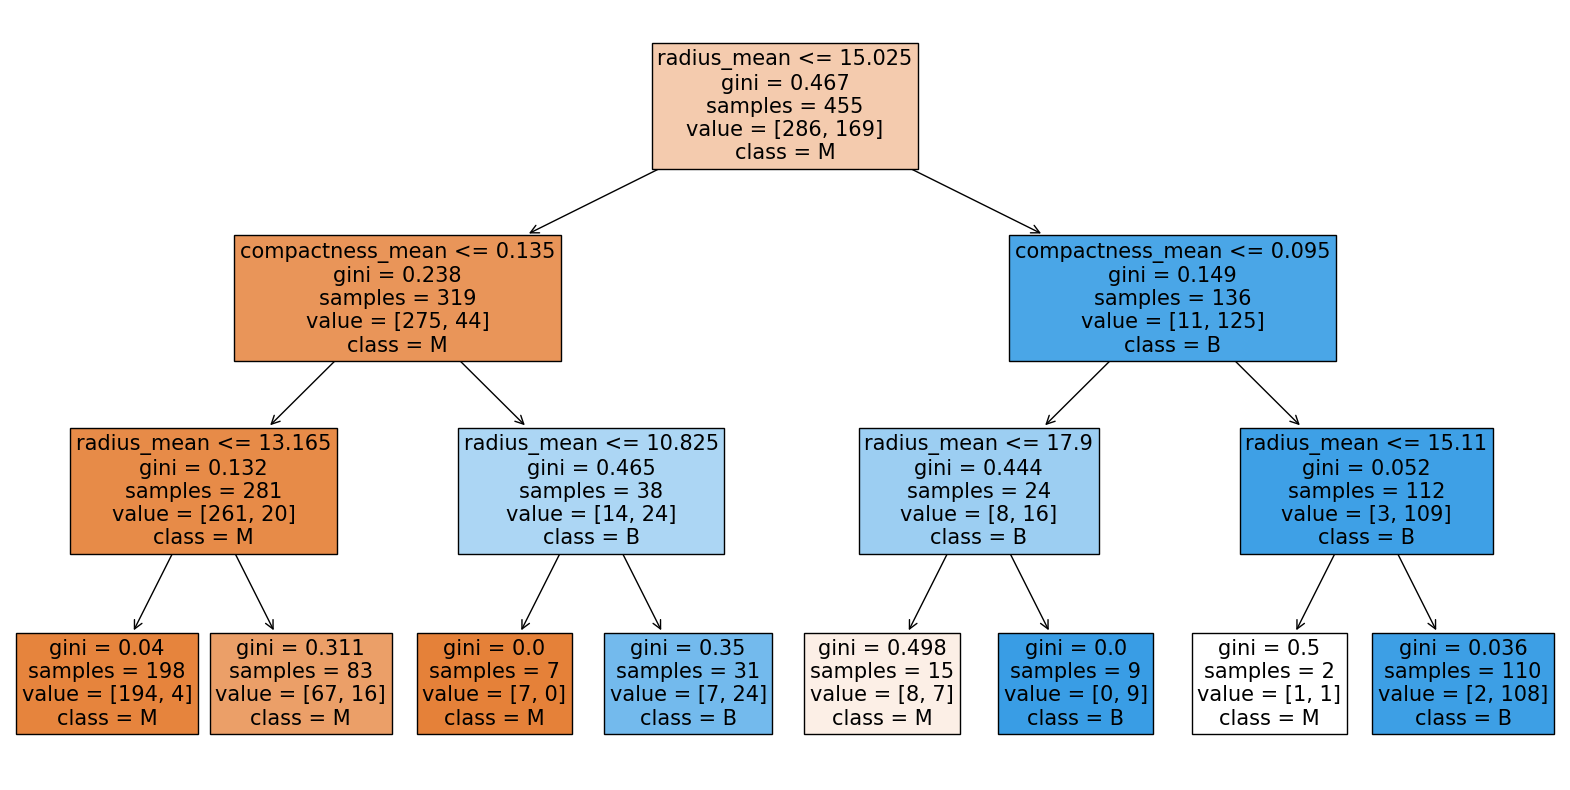

In [7]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
a = plot_tree(dtree_light, feature_names=x.columns, fontsize=15, filled=True, class_names=['M','B'])
plt.show()
# GINI and ENTROPY